In [27]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [28]:
# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [29]:
# 3. 시퀀스 생성
window = 12   # 최근 12개월 → 다음달 예측
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)

In [30]:
# 4. 모델 정의
# RNN 모델
model_rnn = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])
model_rnn.compile(optimizer='adam', loss='mse')
history_rnn = model_rnn.fit(X, y, epochs=50, batch_size=8, verbose=1)

# LSTM 모델
from tensorflow.keras import layers, callbacks, optimizers

model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(window,1),
                         activation='tanh'),  # activation 명시
    tf.keras.layers.LSTM(32, activation='tanh'),
    tf.keras.layers.Dense(16, activation='relu'),  # 추가 Dense 레이어
    tf.keras.layers.Dense(1)
])

# 학습률을 약간 높임
model_lstm.compile(optimizer=optimizers.Adam(learning_rate=0.002), loss='mse')
history_lstm = model_lstm.fit(X, y, epochs=80, batch_size=8, verbose=1)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3903
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0041
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0014
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0019
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0019
Epoch 13/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0017
Epoch 14/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0015
Epoch 15/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030
Epoch 16/50
40/40 ━━━━━━━━

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


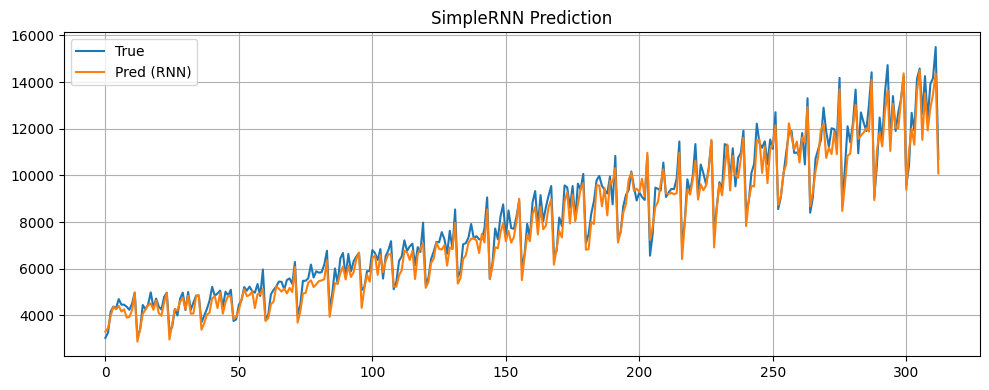

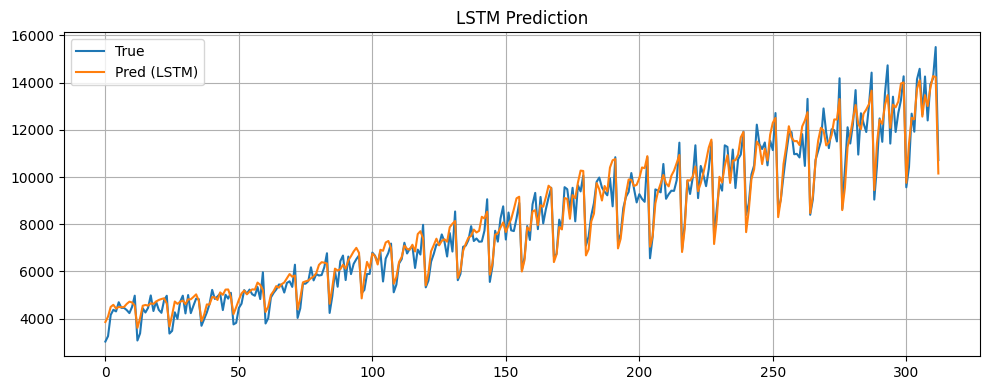

In [31]:
# 5. 예측 (각 모델별)
pred_rnn  = model_rnn.predict(X)
pred_lstm = model_lstm.predict(X)

# 시각화: RNN
plt.figure(figsize=(10,4))
plt.plot(scaler.inverse_transform(y), label='True')
plt.plot(scaler.inverse_transform(pred_rnn), label='Pred (RNN)')
plt.legend(); plt.grid(True); plt.title('SimpleRNN Prediction'); plt.tight_layout()
plt.show()

# 시각화: LSTM
plt.figure(figsize=(10,4))
plt.plot(scaler.inverse_transform(y), label='True')
plt.plot(scaler.inverse_transform(pred_lstm), label='Pred (LSTM)')
plt.legend(); plt.grid(True); plt.title('LSTM Prediction'); plt.tight_layout()
plt.show()

In [32]:
# 6. 성능 지표 (MSE / RMSE / MAE)
y_true_inv = scaler.inverse_transform(y)

# RNN
mse_rnn  = mean_squared_error(y_true_inv, scaler.inverse_transform(pred_rnn))
rmse_rnn = np.sqrt(mse_rnn)
mae_rnn  = mean_absolute_error(y_true_inv, scaler.inverse_transform(pred_rnn))
print(f"[RNN ] MSE : {mse_rnn:,.4f}")
print(f"[RNN ] RMSE: {rmse_rnn:,.4f}")
print(f"[RNN ] MAE : {mae_rnn:,.4f}")

# LSTM
mse_lstm  = mean_squared_error(y_true_inv, scaler.inverse_transform(pred_lstm))
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm  = mean_absolute_error(y_true_inv, scaler.inverse_transform(pred_lstm))
print(f"[LSTM] MSE : {mse_lstm:,.4f}")
print(f"[LSTM] RMSE: {rmse_lstm:,.4f}")
print(f"[LSTM] MAE : {mae_lstm:,.4f}")

print("\n== Summary ==")
print(f"RNN  -> MSE: {mse_rnn:,.4f}, RMSE: {rmse_rnn:,.4f}, MAE: {mae_rnn:,.4f}")
print(f"LSTM -> MSE: {mse_lstm:,.4f}, RMSE: {rmse_lstm:,.4f}, MAE: {mae_lstm:,.4f}")

[RNN ] MSE : 221,431.1757
[RNN ] RMSE: 470.5647
[RNN ] MAE : 379.9530
[LSTM] MSE : 262,949.8427
[LSTM] RMSE: 512.7864
[LSTM] MAE : 402.0302

== Summary ==
RNN  -> MSE: 221,431.1757, RMSE: 470.5647, MAE: 379.9530
LSTM -> MSE: 262,949.8427, RMSE: 512.7864, MAE: 402.0302
